 _**Capstone 2: Preprocessing & Training Data Development**_
 
 <u>**End Goal**<u> -

The goal of this notebook is to prepare the cleaned credit card fraud dataset for machine learning models.
We’ll perform the following key tasks:

- Load the cleaned dataset

- Scale numeric features to standardize ranges

- Split the data into training and testing sets

- Handle extreme class imbalance using SMOTE

- Save the preprocessed data for use in the modeling step

- This ensures that our models are trained on clean, well-structured, and balanced data.

**Importing important libraries to help with handling data, performing preprocessing, splitting datasets, balancing classes, and creating visualizations , ETC.**

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# For cleaner visuals
sns.set(style="whitegrid", palette="pastel")


**Libraries are successfully loaded, and we’re ready to process the data.** ⬆️


**We load the dataset we cleaned in the previous notebook (Data Wrangling / EDA).
This dataset is already free of missing values and ready for preprocessing** ⬇️

In [31]:
df = pd.read_csv("creditcard_sample.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,44932.0,1.212868,0.314473,0.280272,0.642528,-0.173938,-0.599932,0.017676,-0.072350,0.009880,...,-0.258437,-0.705438,0.157189,0.037345,0.147432,0.123681,-0.005811,0.027712,1.98,0
1,19676.0,-0.042815,1.176697,0.043358,0.604963,0.091294,-0.161744,-0.890933,-2.588433,0.595272,...,-1.447158,0.011065,0.029984,0.006999,0.413975,0.319339,0.039097,0.259612,0.76,0
2,94533.0,0.270160,0.792771,-0.277856,-0.095859,1.073333,-0.440614,1.029284,-0.374799,1.611696,...,-0.157880,0.112374,-0.130635,0.455802,-0.148961,0.474769,-0.204900,-0.200123,39.99,0
3,29086.0,1.252733,0.293642,0.053431,0.516684,0.076941,-0.295868,-0.004559,-0.029834,0.067626,...,-0.296023,-0.815108,0.093337,-0.504924,0.214941,0.157597,-0.007207,0.021775,0.89,0
4,82168.0,-0.089956,1.251482,0.044823,2.015908,0.537991,1.714838,-1.049764,-2.037580,-0.536713,...,2.541931,0.043431,0.359707,-1.365907,-0.790213,0.074159,0.012837,-0.134409,10.59,0


_**What does this do?**_

- Displays the first 5 rows.

- Confirms the dataset has the expected columns (**V1–V28, Time, Amount, Class**).

- Shows that all features are numeric, which is ideal for scaling and modeling.

_**Why it matters:**_

- Ensures we are starting with clean, consistent data.

- Lets us verify column names and understand the structure before preprocessing.

In [32]:
print("Shape of the dataset:", df.shape)
print(df.info())

Shape of the dataset: (28924, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28924 entries, 0 to 28923
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    28924 non-null  float64
 1   V1      28924 non-null  float64
 2   V2      28924 non-null  float64
 3   V3      28924 non-null  float64
 4   V4      28924 non-null  float64
 5   V5      28924 non-null  float64
 6   V6      28924 non-null  float64
 7   V7      28924 non-null  float64
 8   V8      28924 non-null  float64
 9   V9      28924 non-null  float64
 10  V10     28924 non-null  float64
 11  V11     28924 non-null  float64
 12  V12     28924 non-null  float64
 13  V13     28924 non-null  float64
 14  V14     28924 non-null  float64
 15  V15     28924 non-null  float64
 16  V16     28924 non-null  float64
 17  V17     28924 non-null  float64
 18  V18     28924 non-null  float64
 19  V19     28924 non-null  float64
 20  V20     28924 non-null  float64
 21  V

_**Next**_- ⬇️

We divide the dataset into:

- **Features (X)**: Input variables used for model training (**V1–V28, Time, Amount**)

- **Target (y)**: Output variable we want to predict (Class → fraud = 1, non-fraud = 0)

In [36]:
X = df.drop("Class", axis=1)
y = df["Class"]

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (28924, 30)
Shape of y: (28924,)


_**This gives us**_ -

**X.shape** → shows number of rows and columns for features

**y.shape** → shows length of target variable

_**Why it matters:**_

This separation is required for preprocessing and training machine learning models.

Allows us to apply scaling and other transformations only to features.

_**Consequently**_ ⬇️ 

Features like Amount and Time have very different scales.

Amount can range into thousands, **while V1–V28 are PCA-transformed**(Principal Component Analysis).

Scaling standardizes all features to have **mean = 0**and **standard deviation = 1**, so no feature dominates others during training.

In [41]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to a DataFrame for readability
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Quick check
X_scaled.describe().T.head()


,count,mean,std,min,25%,50%,75%,max
Time,28924.0,-6.632780e-17,1.000017,-1.993784,-0.850644,-0.210708,0.935585,1.644000
V1,28924.0,-1.547649e-17,1.000017,-15.414614,-0.401676,0.032162,0.634910,1.150283
V2,28924.0,0.000000e+00,1.000017,-22.218430,-0.379851,0.011618,0.447684,12.693525
V3,28924.0,-4.913171e-18,1.000017,-16.088702,-0.436176,0.138299,0.579284,2.079672
V4,28924.0,1.719610e-18,1.000017,-3.397259,-0.582102,-0.040787,0.460058,8.158490


_**To make everything fair for the model, we standardize them so they’re all on a similar scale.**_ ⬆️

- Each feature now has mean ≈ 0 and standard deviation ≈ 1.

- Ensures features are comparable in magnitude.

_**Why it matters:**_

- Many machine learning algorithms (Logistic Regression, SVM, Neural Networks) perform better when features are scaled.

- Prevents large features from dominating smaller ones.

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)
print("Class distribution in training data:", Counter(y_train))


Training set size: (23139, 30)
Testing set size: (5785, 30)
Class distribution in training data: Counter({0: 22745, 1: 394})


_**Now that our data is clean and scaled, we will be splitting it into:**_

**Training set (80%)** → to train the model

**Testing set (20%)** → to check if it works well on new data

We will use train_test_split() for that.
Also, we will keep the same fraud ratio in both parts using stratify=y.

_**Why it matters:**_
- So, the Machine learning model doesnt just memorize patterns from the data its trained on, It should also perform well on new and unseen data.
- Ensures fair evaluation of the model.
- Stratification prevents accidental under-representation of fraud in training or testing sets.

_**Tackling imbalance with SMOTE**_ ⬇️

- The dataset is extremely imbalanced: only ~0.17% of transactions are fraud.

- Models trained on imbalanced data tend to ignore the minority class.

- SMOTE generates synthetic fraud samples in the training set to balance the classes.

- We only apply SMOTE to training data to avoid affecting the testing set.

Before SMOTE: Counter({0: 22745, 1: 394})
After SMOTE: Counter({0: 22745, 1: 22745})


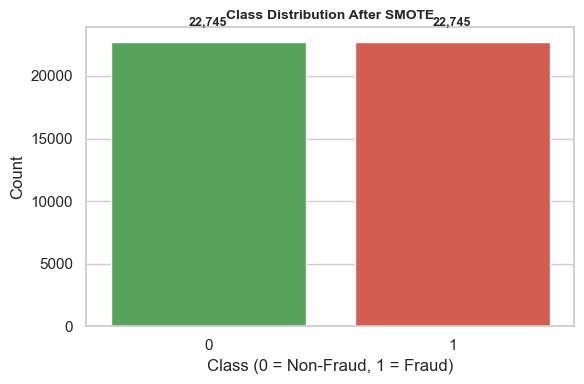

In [39]:
sm = SMOTE(random_state=42)

print("Before SMOTE:", Counter(y_train))

# Apply SMOTE only to training data
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

print("After SMOTE:", Counter(y_train_resampled))

# Convert back to DataFrame
X_train_resampled = pd.DataFrame(X_train_resampled, columns=X_train.columns)
y_train_resampled = pd.Series(y_train_resampled, name="Class")

# Visualize new balance
plt.figure(figsize=(6,4))

ax = sns.barplot(
    x=y_train_resampled.value_counts().index,
    y=y_train_resampled.value_counts().values,
    hue=y_train_resampled.value_counts().index, 
    palette=['#4CAF50','#E74C3C'],
    legend=False
)


for i, value in enumerate(y_train_resampled.value_counts().values):
    ax.text(i, value + 1000, f"{value:,}", ha='center', va='bottom', fontsize=9, fontweight='bold')
plt.title("Class Distribution After SMOTE", fontsize=10, fontweight='bold')
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()
plt.show()


_**Why did we use SMOTE?**_ 

**Before SMOTE**: far fewer fraud transactions than non-fraud.

**After SMOTE**: fraud and non-fraud classes are balanced.

- Bar chart clearly shows the counts of both classes, with labels for clarity.

_**Why it matters:**_

- Balancing the dataset improves model learning for rare fraud cases.

- Ensures the model doesn’t just predict “non-fraud” all the time.



In [40]:
X_train_resampled.to_csv("X_train_SMOTE.csv", index=False)
y_train_resampled.to_csv("y_train_SMOTE.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

print("✅ Files saved successfully! Ready for modeling.")


✅ Files saved successfully! Ready for modeling.


_**Lastly**_ -
- We save these files so it can be ready for building and evaluating models.